In [1]:
import numpy as np
import pandas as pd
from glmnet import GLMNet, RegGLM, GLM
from sklearn.base import clone
import statsmodels.api as sm
from ISLP.models import summarize
import logging
logging.basicConfig(filename='log.txt', level=logging.DEBUG)

import rpy2
%load_ext rpy2.ipython

   user  system elapsed 
  0.941   0.015   0.957 


Loaded lars 1.3

Loading required package: Matrix
Loaded glmnet 4.1-7


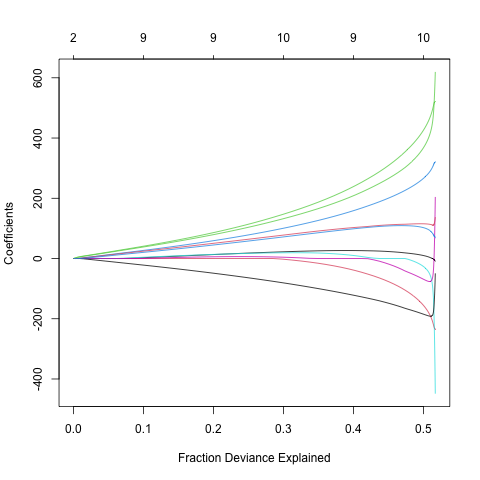

In [2]:
%%R -o X,Y,N
#install.packages('lars', repo='http://cloud.r-project.org')
library(lars)
library(glmnet)
data(diabetes)
X = model.matrix(lm(y ~ x, data=diabetes))[,-1]
N = colnames(diabetes$x)
Y = diabetes$y
plot(glmnet(X, Y, family=gaussian(), alpha=0.4), xvar='dev')
system.time(cv.glmnet(X, Y, family=gaussian(), 
                      alpha=0.4, nfolds=10))

In [3]:
X = pd.DataFrame(X, columns=N)
G = GLMNet(alpha=.4)
G.fit(X, Y)

GLMNet(lambda_values=array([1.00000000e+00, 9.11162756e-01, 8.30217568e-01, 7.56463328e-01,
       6.89261210e-01, 6.28029144e-01, 5.72236766e-01, 5.21400829e-01,
       4.75081016e-01, 4.32876128e-01, 3.94420606e-01, 3.59381366e-01,
       3.27454916e-01, 2.98364724e-01, 2.71858824e-01, 2.47707636e-01,
       2.25701972e-01, 2.05651231e-01, 1.87381742e-01, 1.70735265e-01,
       1.55567614e-01, 1.41747416e-01, 1.29154967e-01, 1.17681195e-01,
       1.07226722e-01, 9.77009957e-02, 8.90215085e-02, 8.11130831e-02,
       7.39072203e-02, 6.73415066e-02, 6.13590727e-02, 5.59081018e-02,
       5.09413801e-02, 4.64158883e-02, 4.22924287e-02, 3.85352859e-02,
       3.51119173e-02, 3.19926714e-02, 2.91505306e-02, 2.65608778e-02,
       2.42012826e-02, 2.20513074e-02, 2.00923300e-02, 1.83073828e-02,
       1.66810054e-02, 1.51991108e-02, 1.38488637e-02, 1.26185688e-02,
       1.14975700e-02, 1.04761575e-02, 9.54548457e-03, 8.69749003e-03,
       7.92482898e-03, 7.22080902e-03, 6.57933225e-03, 5.99484250e-03,
       5.46227722e-03, 4.97702356e-03, 4.53487851e-03, 4.13201240e-03,
       3.76493581e-03, 3.43046929e-03, 3.12571585e-03, 2.84803587e-03,
       2.59502421e-03, 2.36448941e-03, 2.15443469e-03, 1.96304065e-03,
       1.78864953e-03, 1.62975083e-03, 1.48496826e-03, 1.35304777e-03,
       1.23284674e-03, 1.12332403e-03, 1.02353102e-03, 9.32603347e-04,
       8.49753436e-04, 7.74263683e-04, 7.05480231e-04, 6.42807312e-04,
       5.85702082e-04, 5.33669923e-04, 4.86260158e-04, 4.43062146e-04,
       4.03701726e-04, 3.67837977e-04, 3.35160265e-04, 3.05385551e-04,
       2.78255940e-04, 2.53536449e-04, 2.31012970e-04, 2.10490414e-04,
       1.91791026e-04, 1.74752840e-04, 1.59228279e-04, 1.45082878e-04,
       1.32194115e-04, 1.20450354e-04, 1.09749877e-04, 1.00000000e-04]), lambda_fractional=True, alpha=0.4, lower_limits=-inf, upper_limits=inf, penalty_factor=None, fit_intercept=True, standardize=True, family=<statsmodels.genmod.families.family.Gaussian object at 0x14becfb80>, control=GLMNetControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05))

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='Coefficients ($\\beta$)'>

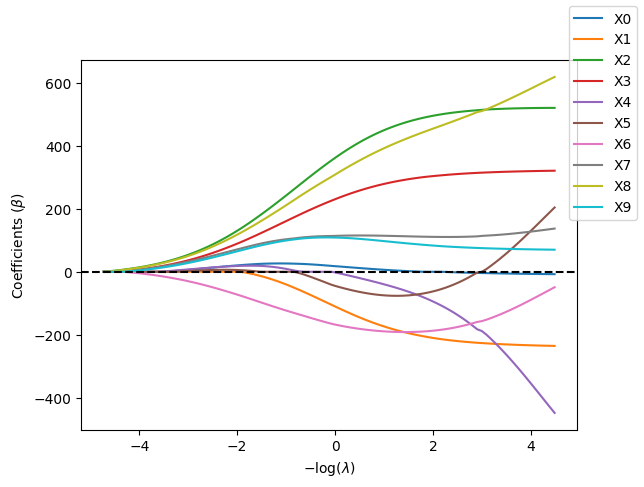

In [4]:
G.plot_coefficients(legend=True)

In [5]:
%%prun 
G.cross_validation_path(X, Y, cv=100, alignment='lambda')

In [6]:
#%%timeit
G.control.logging = True
G.cross_validation_path(X, Y, cv=50, alignment='lambda')

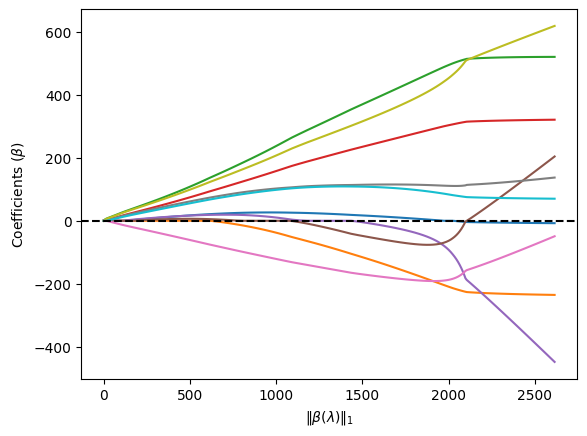

In [7]:
G.plot_coefficients(xvar='norm');

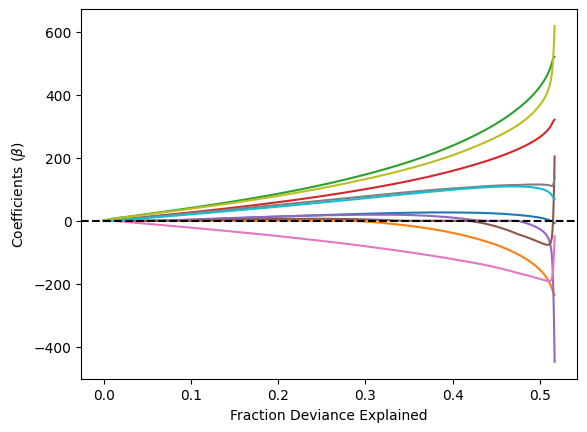

In [8]:
G.plot_coefficients(xvar='dev');

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='GLM Deviance'>

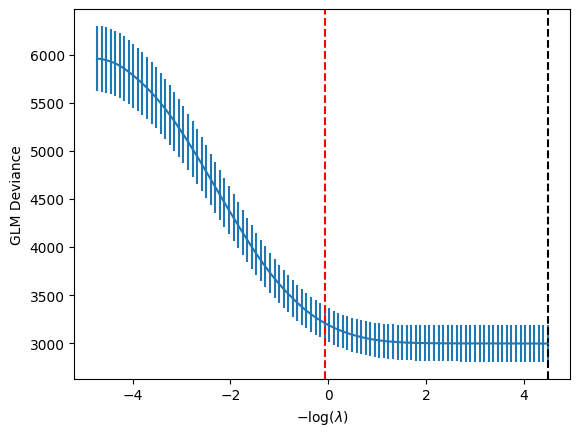

In [9]:
G.plot_cross_validation()

<Axes: xlabel='$-\\log(\\lambda)$', ylabel='GLM Deviance'>

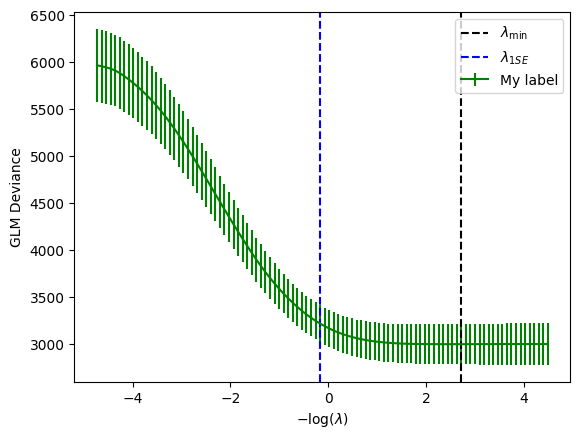

In [10]:
G2 = clone(G)
G2.fit(X, Y)
G2.cross_validation_path(X, Y, cv=10, alignment='fraction')
G2.plot_cross_validation(c='green', label='My label', legend=True, col_1se='blue')

In [11]:
yb = Y + np.random.standard_normal(Y.shape) > 140
X.insert(0, 'intercept', np.ones(Y.shape[0]))
glm = sm.GLM(yb,X,family=sm.families.Binomial())
results=glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0358,0.126,0.284,0.777
age,0.8568,2.791,0.307,0.759
sex,-12.1922,3.090,-3.946,0.000
bmi,14.7722,3.352,4.407,0.000
map,10.7862,3.115,3.462,0.001
tc,-33.2689,23.218,-1.433,0.152
ldl,22.8364,19.667,1.161,0.246
hdl,-0.4954,11.283,-0.044,0.965
tch,1.1309,8.107,0.140,0.889
ltg,29.4225,9.676,3.041,0.002


In [12]:
from glmnet import GLM, RegGLM

#G3 = GLMNetPath(alpha=.4,family=sm.families.Binomial())
G3 = GLM(family=sm.families.Binomial(), summarize=True)
G3.fit(X.drop(columns=['intercept']), yb)
G3.summary_

,coef,std err,t,P>|t|
intercept,0.035774,0.126082,0.283738,0.776611
age,0.856775,2.791095,0.306967,0.758868
sex,-12.192169,3.089858,-3.945868,0.000080
bmi,14.772171,3.352276,4.406609,0.000011
map,10.786163,3.115451,3.462151,0.000536
tc,-33.268875,23.217752,-1.432907,0.151884
ldl,22.836411,19.666658,1.161174,0.245571
hdl,-0.495428,11.282413,-0.043912,0.964975
tch,1.130896,8.106640,0.139502,0.889053
ltg,29.422547,9.675637,3.040890,0.002359


In [13]:
np.isnan(yb).sum()

0

In [14]:
G3 = RegGLM(family=sm.families.Binomial(), alpha=0.4, lambda_val=0.02081227758950013)
G3.fit(X.drop(columns=['intercept']), yb)
G3.coef_
G3.null_deviance_

612.7059080258448

In [15]:
G4 = GLMNet(family=sm.families.Binomial(), alpha=0.4 )
G4.fit(X.drop(columns=['intercept']), yb)


GLMNet(lambda_values=array([1.00000000e+00, 9.11162756e-01, 8.30217568e-01, 7.56463328e-01,
       6.89261210e-01, 6.28029144e-01, 5.72236766e-01, 5.21400829e-01,
       4.75081016e-01, 4.32876128e-01, 3.94420606e-01, 3.59381366e-01,
       3.27454916e-01, 2.98364724e-01, 2.71858824e-01, 2.47707636e-01,
       2.25701972e-01, 2.05651231e-01, 1.87381742e-01, 1.70735265e-01,
       1.55567614e-01, 1.41747416e-01, 1.29154967e-01, 1.17681195e-01,
       1.07226722e-01, 9.77009957e-02, 8.90215085e-02, 8.11130831e-02,
       7.39072203e-02, 6.73415066e-02, 6.13590727e-02, 5.59081018e-02,
       5.09413801e-02, 4.64158883e-02, 4.22924287e-02, 3.85352859e-02,
       3.51119173e-02, 3.19926714e-02, 2.91505306e-02, 2.65608778e-02,
       2.42012826e-02, 2.20513074e-02, 2.00923300e-02, 1.83073828e-02,
       1.66810054e-02, 1.51991108e-02, 1.38488637e-02, 1.26185688e-02,
       1.14975700e-02, 1.04761575e-02, 9.54548457e-03, 8.69749003e-03,
       7.92482898e-03, 7.22080902e-03, 6.57933225e-03, 5.99484250e-03,
       5.46227722e-03, 4.97702356e-03, 4.53487851e-03, 4.13201240e-03,
       3.76493581e-03, 3.43046929e-03, 3.12571585e-03, 2.84803587e-03,
       2.59502421e-03, 2.36448941e-03, 2.15443469e-03, 1.96304065e-03,
       1.78864953e-03, 1.62975083e-03, 1.48496826e-03, 1.35304777e-03,
       1.23284674e-03, 1.12332403e-03, 1.02353102e-03, 9.32603347e-04,
       8.49753436e-04, 7.74263683e-04, 7.05480231e-04, 6.42807312e-04,
       5.85702082e-04, 5.33669923e-04, 4.86260158e-04, 4.43062146e-04,
       4.03701726e-04, 3.67837977e-04, 3.35160265e-04, 3.05385551e-04,
       2.78255940e-04, 2.53536449e-04, 2.31012970e-04, 2.10490414e-04,
       1.91791026e-04, 1.74752840e-04, 1.59228279e-04, 1.45082878e-04,
       1.32194115e-04, 1.20450354e-04, 1.09749877e-04, 1.00000000e-04]), lambda_fractional=True, alpha=0.4, lower_limits=-inf, upper_limits=inf, penalty_factor=None, fit_intercept=True, standardize=True, family=<statsmodels.genmod.families.family.Binomial object at 0x17a0ab580>, control=GLMNetControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05))